### Dataset :https://www.kaggle.com/arushchillar/disneyland-reviews

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

In [88]:
df = pd.read_csv('DisneylandReviews.csv',encoding = 'latin-1')
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


In [4]:
### to check the duplicate data
df.Review_ID.value_counts()

121586148    2
164830205    2
129231609    2
168489234    2
226905150    2
            ..
428912320    1
428910029    1
428894903    1
428884275    1
1536786      1
Name: Review_ID, Length: 42636, dtype: int64

In [5]:
## to remove the duplicates data
df.drop_duplicates(subset = 'Review_ID',inplace=True,keep = 'first')

In [6]:
## year_month column changes to datetime datatype
df['Year_Month'] = pd.to_datetime(df['Year_Month'],errors = 'coerce')

In [7]:
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-04-01,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-05-01,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-04-01,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-04-01,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-04-01,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [8]:
### to create year and Month columns Separately
df['Year'] = df['Year_Month'].dt.year
df['Month'] = df['Year_Month'].dt.month

In [9]:
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Year,Month
0,670772142,4,2019-04-01,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019.0,4.0
1,670682799,4,2019-05-01,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019.0,5.0
2,670623270,4,2019-04-01,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019.0,4.0
3,670607911,4,2019-04-01,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019.0,4.0
4,670607296,4,2019-04-01,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019.0,4.0


In [10]:
## to check the missing values
df.isnull().sum()

Review_ID               0
Rating                  0
Year_Month           2613
Reviewer_Location       0
Review_Text             0
Branch                  0
Year                 2613
Month                2613
dtype: int64

In [11]:
## to remove the missing values
df.dropna(inplace=True)

In [12]:
df.shape

(40023, 8)

### Question:1

#### Which year has the Maximum Reviews?

In [13]:
df['Year'].value_counts().sort_values(ascending = False)

2015.0    6979
2016.0    6599
2014.0    5300
2017.0    5195
2013.0    4709
2012.0    4339
2018.0    3997
2011.0    1976
2019.0     786
2010.0     143
Name: Year, dtype: int64

### Question:2

### Which Month has the Maximum Reviews?

In [14]:
df['Month'].value_counts().sort_values(ascending = False)

8.0     3994
7.0     3876
12.0    3870
10.0    3764
6.0     3588
4.0     3476
5.0     3436
9.0     3229
3.0     3132
11.0    2684
1.0     2515
2.0     2459
Name: Month, dtype: int64

### Question:3

### People from which country gave the maximum reviews and also find the top 10 countries in terms of reviews?

In [15]:
df['Reviewer_Location'].value_counts().sort_values(ascending=False)[:10]

United States     13513
United Kingdom     9115
Australia          4409
Canada             2115
India              1469
Philippines        1024
Singapore           968
New Zealand         714
Malaysia            560
Hong Kong           515
Name: Reviewer_Location, dtype: int64

### Question:4

### Find out the number of reviews for each branch of Disneyland?

In [16]:
df['Branch'].value_counts().sort_values(ascending=False)

Disneyland_California    18196
Disneyland_Paris         12693
Disneyland_HongKong       9134
Name: Branch, dtype: int64

### Question:5
### How is the Rating distributed?


In [17]:
df['Rating'].value_counts().sort_values(ascending=False)

5    21899
4    10079
3     4778
2     1929
1     1338
Name: Rating, dtype: int64

### Question:6
### Which is the overall rating(mean rating)?

In [18]:
df['Rating'].mean()

4.231092122029833

#### Question:7 

#### Find top 5 countries gave the best ratings to Disneyland?

In [19]:
df.groupby('Reviewer_Location')['Rating'].mean().sort_values(ascending=False)[:5]

Reviewer_Location
Libya                    5.0
Caribbean Netherlands    5.0
Cuba                     5.0
Curaçao                  5.0
Ethiopia                 5.0
Name: Rating, dtype: float64

### Question:8

#### with which Branch the customers are satisfied with?

In [20]:
df.groupby('Branch')['Rating'].mean().sort_values(ascending = False)

Branch
Disneyland_California    4.413717
Disneyland_HongKong      4.215568
Disneyland_Paris         3.980462
Name: Rating, dtype: float64

#### Question:9

#### Rating Distribution of each Branch and what can you inferred from the Distribution?

In [21]:
df[df['Branch']=='Disneyland_California']['Rating'].value_counts()

5    11799
4     3711
3     1551
2      685
1      450
Name: Rating, dtype: int64

In [22]:
df[df['Branch']=='Disneyland_California']['Rating'].value_counts()*100/len(df[df['Branch']=='Disneyland_California'])

5    64.843922
4    20.394592
3     8.523851
2     3.764564
1     2.473071
Name: Rating, dtype: float64

In [23]:
df[df['Branch']=='Disneyland_HongKong']['Rating'].value_counts()*100/len(df[df['Branch']=='Disneyland_HongKong'])

5    47.438143
4    33.369827
3    14.166849
2     3.361069
1     1.664112
Name: Rating, dtype: float64

In [24]:
df[df['Branch']=='Disneyland_Paris']['Rating'].value_counts()*100/len(df[df['Branch']=='Disneyland_Paris'])

5    45.434491
4    26.156149
3    15.228866
2     7.382022
1     5.798472
Name: Rating, dtype: float64


### Question:10

### What is the Branch review distributions for Australian customers?

In [25]:
df[df['Reviewer_Location']=='Australia']['Branch'].value_counts()

Disneyland_California    2323
Disneyland_HongKong      1545
Disneyland_Paris          541
Name: Branch, dtype: int64

### Question:11

#### What is the rating distributions by Australian customers?

In [26]:
df[df['Reviewer_Location']=='Australia']['Rating'].value_counts()

5    2535
4    1118
3     482
2     170
1     104
Name: Rating, dtype: int64

#### Question:12

#### What is the overall  rating distributions by Australian customers?

In [27]:
df[df['Reviewer_Location']=='Australia']['Rating'].mean()

4.317759129054207

#### Clean the Text Data

In [28]:
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Year,Month
0,670772142,4,2019-04-01,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019.0,4.0
1,670682799,4,2019-05-01,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019.0,5.0
2,670623270,4,2019-04-01,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019.0,4.0
3,670607911,4,2019-04-01,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019.0,4.0
4,670607296,4,2019-04-01,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019.0,4.0


In [29]:
df['Review_Text'][10]

"Disneyland never cease to amaze me! I've been to Disneyland florida and I thought I have exhausted the kid in me but nope! I still had so much fun in disneyland hong kong. 2 DL off my bucketlist and more to come!     "

In [30]:
data = df[['Review_Text','Rating']]
data.head()

,Review_Text,Rating
0,If you've ever been to Disneyland anywhere you...,4
1,Its been a while since d last time we visit HK...,4
2,Thanks God it wasn t too hot or too humid wh...,4
3,HK Disneyland is a great compact park. Unfortu...,4
4,"the location is not in the city, took around 1...",4


In [36]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
import re

In [40]:
### clean the text Data

nlp = spacy.load('en_core_web_sm')
lemma = WordNetLemmatizer()

In [50]:
list1 = nlp.Defaults.stop_words
print(len(list1))

list2 = stopwords.words('english')
print(len(list2))

stopwords = set(set(list1) | set(list2))
print(len(stopwords))

326
179
382


In [68]:
### simplifying the text
### removing the special characters
### removing the stopwords and
### lamitizing the words

def clean_text(text):
    """"
    It takes text as an input and clean it by applying the several methods
    
    """

    global stopwords
    
    string=""
    
    # lower casing
    text = text.lower()
    
    # simplifying the text
    text=re.sub(r"i'm","i am",text)
    text=re.sub(r"he's","he is",text)
    text=re.sub(r"she's","she is",text)
    text=re.sub(r"that's","that is",text)
    text=re.sub(r"what's","what is",text)
    text=re.sub(r"where's","where is",text)
    text=re.sub(r"\'ll"," will",text)
    text=re.sub(r"\'ve"," have",text)
    text=re.sub(r"\'re"," are",text)
    text=re.sub(r"\'d"," would",text)
    text=re.sub(r"won't","will not",text)
    text=re.sub(r"can't","cannot",text)
    
    # removing any special characters
    text=re.sub(r"[-()\"#!@$%^&*{}?.,:]"," ",text)
    text=re.sub(r"\s+"," ",text)
    text=re.sub('/\b\S\s\b/',' ', text)
    
    for word in text.split():
        if word not in stopwords:
            
            string+=lemma.lemmatize(word) + " "
    return string
    

In [69]:
data['Review_Text'][5]

"Have been to Disney World, Disneyland Anaheim and Tokyo Disneyland but I feel that Disneyland Hong Kong is really too small to be called a Disneyland. It has way too few rides and attractions. Souvenirs, food and even entrance tickets are slightly more expensive than other Disneyland as well. Basically, this park is good only for small children and people who has never been to Disney. The food choices were acceptable, mostly fast food, and not too expensive. Bottled water, however, was VERY expensive but they do have water fountains around for you to refill your water bottles. The parade was pretty good. It was crowded not a problem but what was the problem was the people were just so rude, the pushing and shoving cutting in lines for the rides, gift shops, food stands was just to much to take. forget trying to see one of the shows its a free for all for seats, i don't see how Disney can let this happen, it was by far the worst managed Disney property."

In [70]:
clean_text(data['Review_Text'][5])

'disney world disneyland anaheim tokyo disneyland feel disneyland hong kong small called disneyland way ride attraction souvenir food entrance ticket slightly expensive disneyland basically park good small child people disney food choice acceptable fast food expensive bottled water expensive water fountain refill water bottle parade pretty good crowded problem problem people rude pushing shoving cutting line ride gift shop food stand forget trying show free seat disney let happen far worst managed disney property '

In [71]:
data['Review_Text'] = data['Review_Text'].apply(clean_text)

C:\Users\HP\Anaconda3\envs\envtensorflow\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [72]:
data['Review_Text'][5]

'disney world disneyland anaheim tokyo disneyland feel disneyland hong kong small called disneyland way ride attraction souvenir food entrance ticket slightly expensive disneyland basically park good small child people disney food choice acceptable fast food expensive bottled water expensive water fountain refill water bottle parade pretty good crowded problem problem people rude pushing shoving cutting line ride gift shop food stand forget trying show free seat disney let happen far worst managed disney property '

(-0.5, 1599.5, 799.5, -0.5)

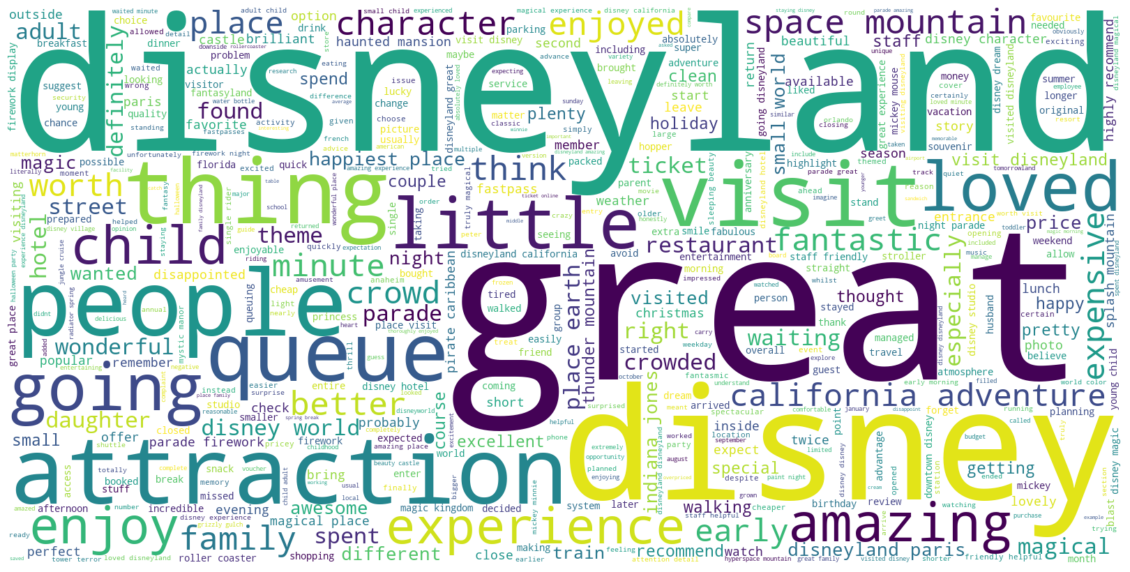

In [96]:
plt.figure(figsize=(20,20))
wc = WordCloud(max_words=500,width = 1600,height=800,
               min_word_length=5,background_color='white').generate(' '.join(data[data.Rating == 5].Review_Text))
plt.imshow(wc,interpolation= 'bilinear')
plt.axis('off')

(-0.5, 1599.5, 799.5, -0.5)

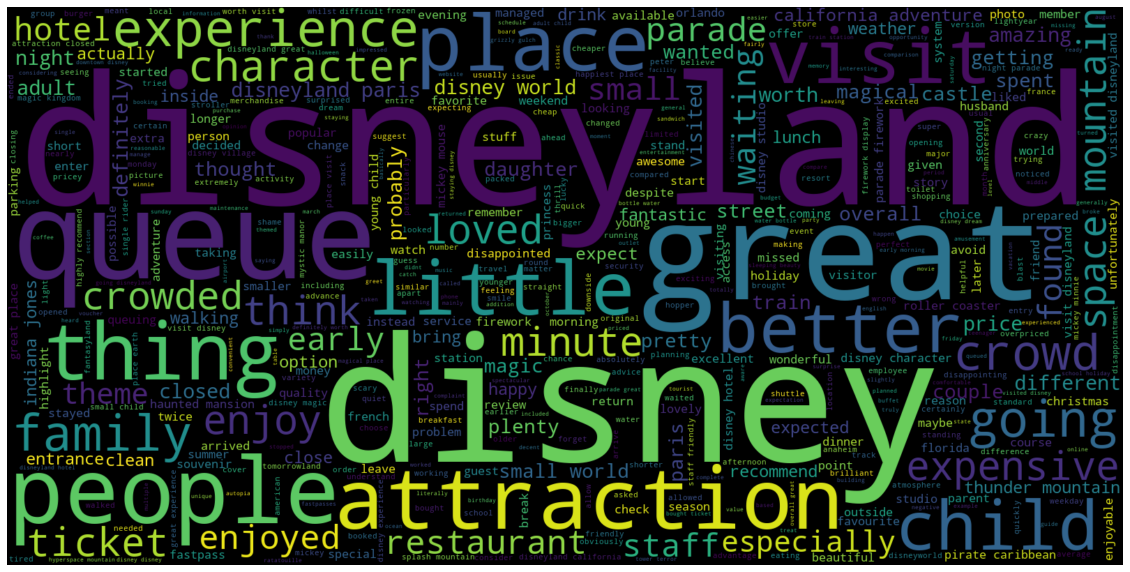

In [110]:
plt.figure(figsize=(20,20))
wc = WordCloud(max_words = 500,width =1600,height = 800,min_word_length = 5).generate(' '.join(data[data.Rating==4].Review_Text))
plt.imshow(wc,interpolation = 'bilinear')
plt.axis('off')

(-0.5, 1599.5, 799.5, -0.5)

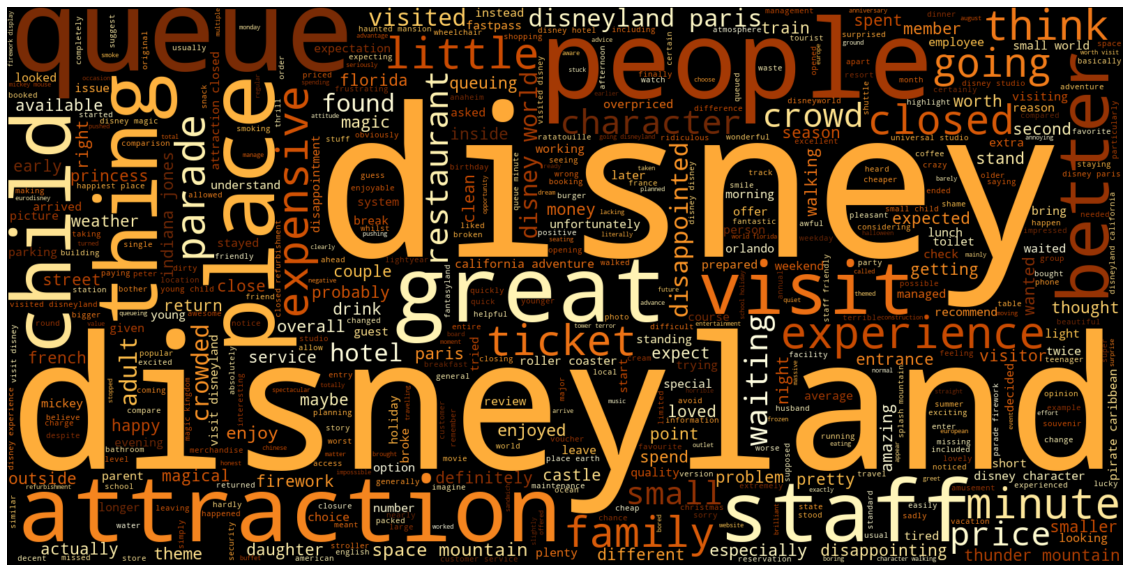

In [112]:
plt.figure(figsize=(20,20))
wc = WordCloud(max_words = 500,width =1600,height = 800,min_word_length = 5,colormap = "YlOrBr").generate(' '.join(data[data.Rating==3].Review_Text))
plt.imshow(wc,interpolation = 'bilinear')
plt.axis('off')

(-0.5, 1599.5, 799.5, -0.5)

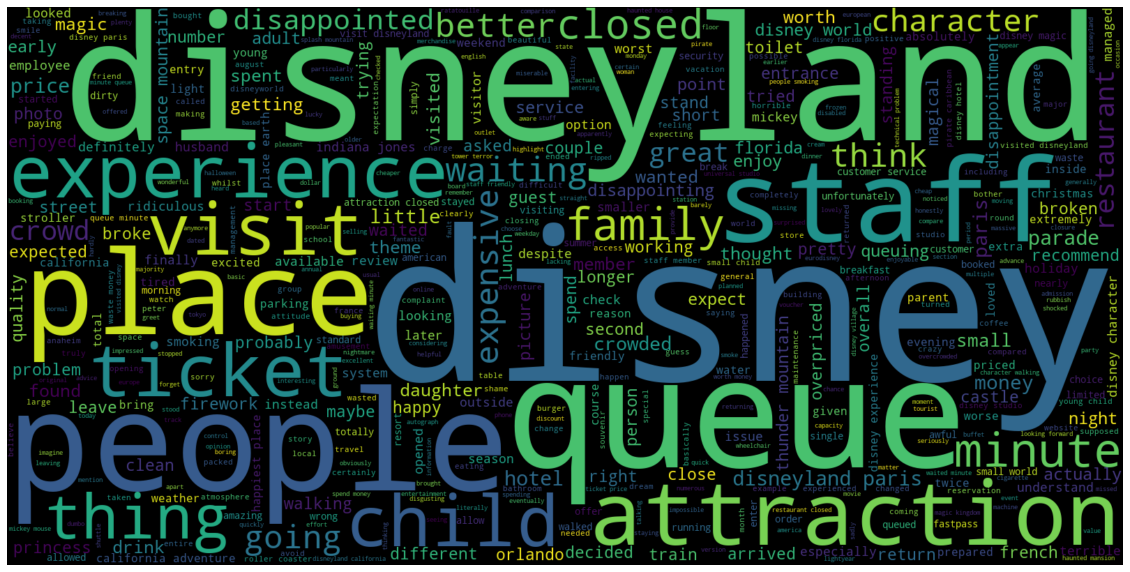

In [114]:
plt.figure(figsize=(20,20))
wc = WordCloud(max_words = 500,width =1600,height = 800,min_word_length = 5,colormap='viridis').generate(' '.join(data[data.Rating==2].Review_Text))
plt.imshow(wc,interpolation = 'bilinear')
plt.axis('off')

(-0.5, 1599.5, 799.5, -0.5)

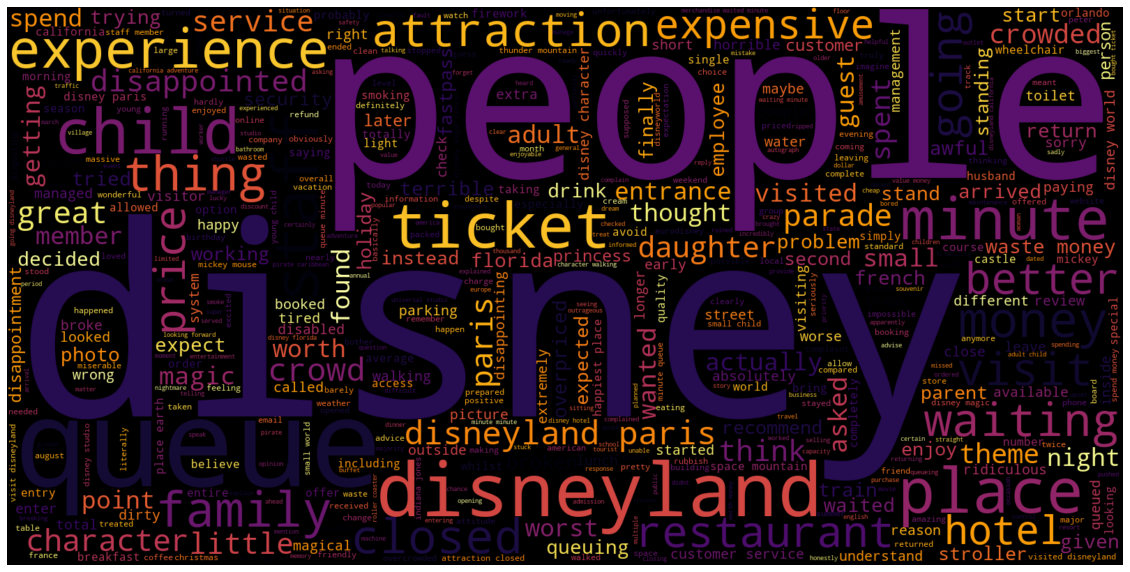

In [115]:
plt.figure(figsize=(20,20))
wc = WordCloud(max_words = 500,width =1600,height = 800,min_word_length = 5,colormap='inferno').generate(' '.join(data[data.Rating==1].Review_Text))
plt.imshow(wc,interpolation = 'bilinear')
plt.axis('off')

In [121]:
### Sentiment Analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [124]:
sid  = SentimentIntensityAnalyzer()

In [127]:
data['score'] = data['Review_Text'].apply(lambda  review: sid.polarity_scores(review))

In [130]:
data['score']

0        {'neg': 0.0, 'neu': 0.81, 'pos': 0.19, 'compou...
1        {'neg': 0.075, 'neu': 0.594, 'pos': 0.331, 'co...
2        {'neg': 0.062, 'neu': 0.527, 'pos': 0.411, 'co...
3        {'neg': 0.111, 'neu': 0.631, 'pos': 0.258, 'co...
4        {'neg': 0.0, 'neu': 0.719, 'pos': 0.281, 'comp...
                               ...                        
42113    {'neg': 0.145, 'neu': 0.803, 'pos': 0.051, 'co...
42114    {'neg': 0.034, 'neu': 0.767, 'pos': 0.199, 'co...
42115    {'neg': 0.123, 'neu': 0.717, 'pos': 0.16, 'com...
42116    {'neg': 0.089, 'neu': 0.746, 'pos': 0.165, 'co...
42117    {'neg': 0.071, 'neu': 0.727, 'pos': 0.202, 'co...
Name: score, Length: 40023, dtype: object

In [132]:
data['score'][0]

{'neg': 0.0, 'neu': 0.81, 'pos': 0.19, 'compound': 0.707}

In [135]:
data['comp_score']  =data['score'].apply(lambda d:d['compound'])

In [137]:
data['comp_score']

0        0.7070
1        0.9842
2        0.9850
3        0.8360
4        0.5106
          ...  
42113   -0.8971
42114    0.9957
42115    0.8692
42116    0.9202
42117    0.7964
Name: comp_score, Length: 40023, dtype: float64

In [138]:
data

,Review_Text,Rating,score,comp_score
0,disneyland find disneyland hong kong similar l...,4,"{'neg': 0.0, 'neu': 0.81, 'pos': 0.19, 'compou...",0.7070
1,time visit hk disneyland time stay tomorrowlan...,4,"{'neg': 0.075, 'neu': 0.594, 'pos': 0.331, 'co...",0.9842
2,thanks god hot humid visiting park big issue l...,4,"{'neg': 0.062, 'neu': 0.527, 'pos': 0.411, 'co...",0.9850
3,hk disneyland great compact park unfortunately...,4,"{'neg': 0.111, 'neu': 0.631, 'pos': 0.258, 'co...",0.8360
4,location city took 1 hour kowlon kid like disn...,4,"{'neg': 0.0, 'neu': 0.719, 'pos': 0.281, 'comp...",0.5106
...,...,...,...,...
42113,pick prompt taxi driver wasnt sure time pickin...,4,"{'neg': 0.145, 'neu': 0.803, 'pos': 0.051, 'co...",-0.8971
42114,returned 4 day family trip disneyland boy aged...,4,"{'neg': 0.034, 'neu': 0.767, 'pos': 0.199, 'co...",0.9957
42115,spent 20 dec 2010 disney park lunchtime attrac...,1,"{'neg': 0.123, 'neu': 0.717, 'pos': 0.16, 'com...",0.8692
42116,looking forward trip christmas period family 2...,2,"{'neg': 0.089, 'neu': 0.746, 'pos': 0.165, 'co...",0.9202


In [142]:
data.groupby('Rating')['comp_score'].describe()

,count,mean,std,min,25%,50%,75%,max
Rating,,,,,,,,
1,1338.0,0.093775,0.697034,-0.9916,-0.61785,0.2023,0.8074,0.9989
2,1929.0,0.354877,0.639033,-0.9873,-0.15130,0.6249,0.9002,0.9979
3,4778.0,0.568018,0.520873,-0.9766,0.38180,0.8126,0.9435,0.9990
4,10079.0,0.765761,0.343995,-0.9933,0.74300,0.9042,0.9643,0.9999
5,21899.0,0.816260,0.269674,-0.9337,0.79600,0.9186,0.9678,0.9998
